In [1]:
import numpy as np
import pandas as pd

## Se toma el primer dataframe

In [2]:
df = pd.read_csv('Registro Despulpe Guanábanas.csv')  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 19 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Marca temporal                                                     112 non-null    object 
 1   Fecha                                                              111 non-null    object 
 2   Guanábanas del Samán                                               83 non-null     float64
 3   Guanábanas de la Casa                                              22 non-null     float64
 4   Guanábanas del Rin                                                 33 non-null     float64
 5   Guanábanas del Caracolí                                            58 non-null     float64
 6   Guanábanas de Roma 2                                               71 non-null     float64
 7   Guanábanas del Almendro   

## Procesos de limpieza

In [4]:
df.drop(columns=['Marca temporal', 'Guanábanas del Samán', 'Guanábanas de la Casa', 'Guanábanas del Rin' , 
                 'Guanábanas del Caracolí', 'Guanábanas de Roma 2', 'Guanábanas del Almendro', 'Guanábanas de Sorrento 1',
                 'Guanábanas de Las Nubes', 'Peso promedio por Guanábana', 'Rendimiento', 'Cantidad de bolsas empacadas, cuantas CON PEPA y cuantas SIN PEPA',
                 'Horas empleadas para la labor', 'Kilos de pulpa por Hora'], inplace=True)

In [5]:
df.drop(columns=['Comentarios'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Fecha                                                  111 non-null    object 
 1   Total de Guanábanas                                    113 non-null    float64
 2   Peso de las guanábanas en gramos ANTES de despulpar    114 non-null    object 
 3   Peso de las guanábanas en gramos DESPUÉS de despulpar  113 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.8+ KB


In [7]:
df = df.rename(columns={'Peso de las guanábanas en gramos ANTES de despulpar': 'Peso ANTES'})
df = df.rename(columns={'Peso de las guanábanas en gramos DESPUÉS de despulpar': 'Peso DESPUÉS'})

In [8]:
df['Peso ANTES'].info()
df['Peso DESPUÉS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 116 entries, 0 to 115
Series name: Peso ANTES
Non-Null Count  Dtype 
--------------  ----- 
114 non-null    object
dtypes: object(1)
memory usage: 1.0+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 116 entries, 0 to 115
Series name: Peso DESPUÉS
Non-Null Count  Dtype 
--------------  ----- 
113 non-null    object
dtypes: object(1)
memory usage: 1.0+ KB


In [9]:
df = df.drop(index=114)

In [10]:
# Remove commas from 'Peso ANTES' and 'Peso DESPUÉS' and convert to numeric
df['Peso ANTES'] = pd.to_numeric(df['Peso ANTES'].str.replace(',', '.'))#, errors='coerce'
df['Peso DESPUÉS'] = pd.to_numeric(df['Peso DESPUÉS'].str.replace(',', '.'))#, errors='coerce'

# Drop rows with NaN values in these columns
df = df.dropna(subset=['Peso ANTES', 'Peso DESPUÉS'])


## Correlación entre las variables antes y después de despulpar

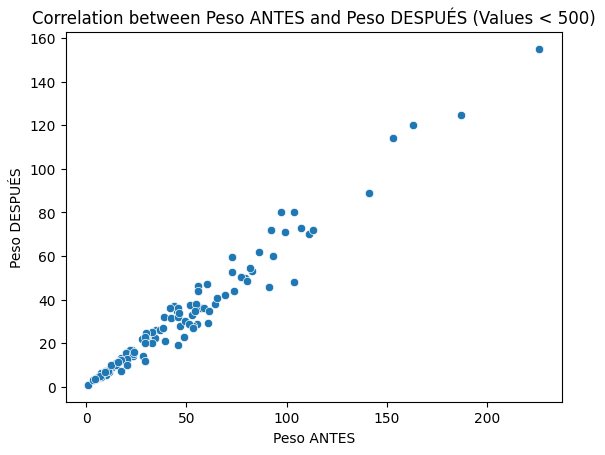

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[(df['Peso ANTES'] < 500) & (df['Peso DESPUÉS'] < 500)]


sns.scatterplot(x='Peso ANTES', y='Peso DESPUÉS', data=filtered_df)
plt.title('Correlation between Peso ANTES and Peso DESPUÉS (Values < 500)')
plt.xlabel('Peso ANTES')
plt.ylabel('Peso DESPUÉS')
plt.show()

Hay otras variables que influyen en el rendimiento, pero de esas variables no hay datos (como cantidad de guanábanas con hongo y cantidad de guanábanas que no maduran de manera homogenea)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 115
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha                111 non-null    object 
 1   Total de Guanábanas  112 non-null    float64
 2   Peso ANTES           112 non-null    float64
 3   Peso DESPUÉS         112 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.4+ KB


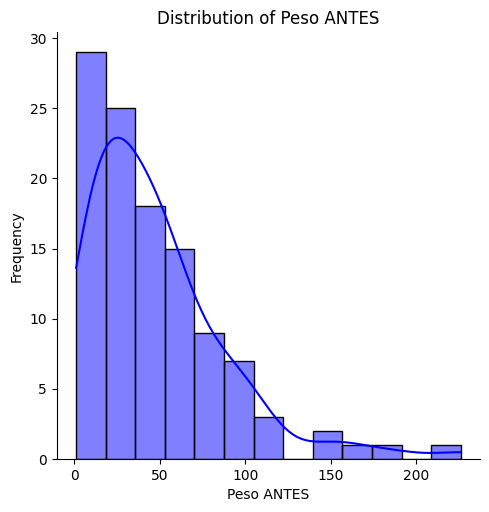

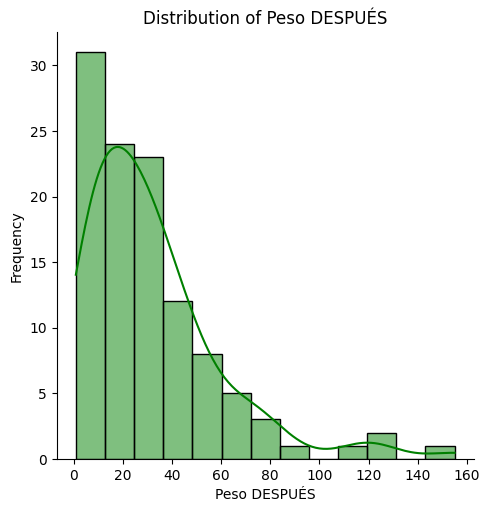

In [13]:
sns.displot(filtered_df['Peso ANTES'], kde=True, color='blue')
plt.title('Distribution of Peso ANTES')
plt.xlabel('Peso ANTES')
plt.ylabel('Frequency')
plt.show()

sns.displot(filtered_df['Peso DESPUÉS'], kde=True, color='green')
plt.title('Distribution of Peso DESPUÉS')
plt.xlabel('Peso DESPUÉS')
plt.ylabel('Frequency')
plt.show()

# Dataframe Polinización

In [14]:
dfP = pd.read_csv('Registro Polinización y Embolse.csv')

In [15]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marca temporal                        403 non-null    object 
 1   Día de embolse o polnización          404 non-null    object 
 2   Cantidad de erizos embolsados         171 non-null    float64
 3   Color de cinta utilizada al embolsar  170 non-null    object 
 4   Lotes en donde se embolsó             172 non-null    object 
 5   Cantidad de flores polinizadas        288 non-null    float64
 6   Lotes en donde se polinizó            288 non-null    object 
 7   Labor                                 403 non-null    object 
dtypes: float64(2), object(6)
memory usage: 25.5+ KB


## Procesos de limpieza

In [16]:
dfP.drop(columns=['Marca temporal'], inplace=True)
dfP.drop(columns=['Color de cinta utilizada al embolsar'], inplace=True)
dfP.drop(columns=['Labor'], inplace=True)
dfP.drop(columns=['Lotes en donde se embolsó'], inplace=True)
dfP.drop(columns=['Lotes en donde se polinizó'], inplace=True)

dfP = dfP.rename(columns={'Día de embolse o polnización': 'Fecha'})


In [17]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fecha                           404 non-null    object 
 1   Cantidad de erizos embolsados   171 non-null    float64
 2   Cantidad de flores polinizadas  288 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.6+ KB


In [18]:
dfP['Fecha'] = dfP['Fecha'].replace('5324', pd.NA)

## 1er Problema, varias registros para una fecha, pero esto no es un error

In [19]:
print(dfP['Fecha'].value_counts())

Fecha
17/12/2024    6
16/08/2024    5
20/08/2024    5
28/08/2024    5
30/08/2024    5
             ..
8/04/2025     1
10/04/2025    1
9/04/2025     1
11/04/2025    1
16/04/2025    1
Name: count, Length: 169, dtype: int64


## Solución al problema
se agruparon los registros de una sola fecha para que quedaran en una sola fila, por lo que se redujo el dataframe y como estamos tratando de predecir inicialmente los kilos totales de pulpa, no se tienen en cuenta los lotes que son los que separaban los registros en varias filas de una misma fecha

In [20]:
dfP['Fecha'] = pd.to_datetime(dfP['Fecha'], dayfirst=True)  
dfP = dfP.groupby('Fecha').sum().reset_index()

In [21]:
print(display(dfP))

,Fecha,Cantidad de erizos embolsados,Cantidad de flores polinizadas
0,2024-07-05,13.0,0.0
1,2024-07-09,0.0,15.0
2,2024-07-10,0.0,80.0
3,2024-07-11,0.0,26.0
4,2024-07-12,0.0,22.0
...,...,...,...
164,2025-04-10,200.0,0.0
165,2025-04-11,205.0,0.0
166,2025-04-14,250.0,0.0
167,2025-04-15,227.0,0.0


None


## Método muy importante para generar una correlación entre la polinización y el embolse con la producción
### Entonces se tomaron en cuenta la cantidad de polinizaciones y embolses dentro de un rango que puede haber sido el causante de la producción del momento en el que se procesó la fruta

In [22]:
def corr_polinizacion(fecha):
    fecha_inicio = fecha - pd.DateOffset(days=210)
    fecha_fin = fecha - pd.DateOffset(days=165)
    mask = (dfP['Fecha'] >= fecha_inicio) & (dfP['Fecha'] <= fecha_fin)
    return dfP.loc[mask, 'Cantidad de flores polinizadas'].sum()

def corr_embolse(fecha):
    fecha_inicio = fecha - pd.DateOffset(days=150)
    fecha_fin = fecha - pd.DateOffset(days=90)
    mask = (dfP['Fecha'] >= fecha_inicio) & (dfP['Fecha'] <= fecha_fin)
    return dfP.loc[mask, 'Cantidad de erizos embolsados'].sum()

## Y por último aplicamos esto al primer dataframe de la producción y el procesamiento de la fruta dentro de dos nuevas columnas

In [23]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)#, errors='coerce'

df['Correlación Polinización'] = df['Fecha'].apply(corr_polinizacion)
df['Correlación Embolse'] = df['Fecha'].apply(corr_embolse)

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,Fecha,Total de Guanábanas,Peso ANTES,Peso DESPUÉS,Correlación Polinización,Correlación Embolse,Año,Mes,Día,DíaSemana
0,2024-09-02,5.0,15.185,11.079000,0.0,0.0,2024.0,9.0,2.0,0.0
1,2024-08-30,17.0,51.629,37.669000,0.0,0.0,2024.0,8.0,30.0,4.0
2,2024-09-06,10.0,30.370,22.158000,0.0,0.0,2024.0,9.0,6.0,4.0
3,2024-09-10,4.0,12.148,8.863000,0.0,0.0,2024.0,9.0,10.0,1.0
4,2024-09-24,2.0,4.800,3.502000,0.0,0.0,2024.0,9.0,24.0,1.0
5,2024-10-01,4.0,8.800,6.420000,0.0,0.0,2024.0,10.0,1.0,1.0
6,2024-10-08,4.0,12.800,9.339000,0.0,13.0,2024.0,10.0,8.0,1.0
7,2024-10-20,1.0,4.400,3.800000,0.0,13.0,2024.0,10.0,20.0,6.0
8,2024-11-03,1.0,6.000,4.000000,0.0,13.0,2024.0,11.0,3.0,6.0
9,2024-11-13,3.0,6.247,4.657000,0.0,53.0,2024.0,11.0,13.0,2.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# --- 1. Preprocesamiento ---

# Suponiendo que tu DataFrame se llama df
# Extraer características de la fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['DíaSemana'] = df['Fecha'].dt.dayofweek

# Seleccionar variables predictoras y objetivo
features = [
    'Peso ANTES',
    'Correlación Polinización',
    'Correlación Embolse',
    'Total de Guanábanas',
    'Año', 'Mes', 'Día', 'DíaSemana'
]
X = df[features]
y = df['Peso DESPUÉS']

# Opcional: Si hay valores nulos, los rellenamos o eliminamos
# X = X.fillna(0)#nosotrso ya tenemos valores limpios
# y = y.fillna(0)

# --- 2. División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#que sería mejor en este caso con o sin random state?, y mirar el test size que tan grande o pequeño lo ponemos

# --- 3. Entrenamiento del modelo ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 4. Evaluación ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")

# --- 5. Predicción de ejemplo ---
ejemplo = X_test.iloc[0:1]#hay q preguntar q es este iloc[0:1]
prediccion = model.predict(ejemplo)#hay q mirar q hace el .predict
print("Predicción para el primer ejemplo de test:", prediccion[0])

MAE: 3.44
RMSE: 6.33
R2: 0.94
MAPE: 12.68%
Predicción para el primer ejemplo de test: 24.48232000000001


In [31]:
from sklearn.linear_model import LinearRegression

# Entrenamiento
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R2: {r2_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}%")

ejemplo = X_test.iloc[0:1]#hay q preguntar q es este iloc[0:1]
prediccion1 = lr_model.predict(ejemplo)#hay q mirar q hace el .predict
print("Predicción para el ejemplo de regresión lineal:", prediccion1[0])


--- Regresión Lineal ---
MAE: 2.33
RMSE: 3.16
R2: 0.99
MAPE: 11.26%
Predicción para el ejemplo de regresión lineal: 26.050768264936863


In [32]:
from xgboost import XGBRegressor

# Entrenamiento
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n--- XGBoost Regressor ---")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R2: {r2_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

ejemplo = X_test.iloc[0:1]#hay q preguntar q es este iloc[0:1]
prediccion2 = xgb_model.predict(ejemplo)#hay q mirar q hace el .predict
print("Predicción para el  ejemplo de xgboost:", prediccion2[0])


--- XGBoost Regressor ---
MAE: 2.56
RMSE: 3.68
R2: 0.98
MAPE: 12.57%
Predicción para el  ejemplo de xgboost: 22.93687
